In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import constrainedzoom as cz
import constrainedzoom.plots as cp
import functools
import numpy as np
import matplotlib.pyplot as p
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from importlib import reload

Here's how to test the behaviour of the unconstrained covariance:

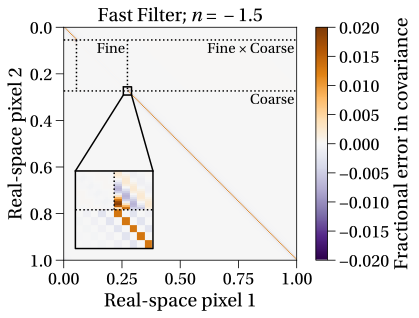

In [3]:
cp.cov_zoom_demo(method=cz.methods.filtered.FilteredZoomConstrained,
                 errors=True,plaw=-1.5,vmin=-0.02,vmax=0.02)

Switch to the traditional zoom method:

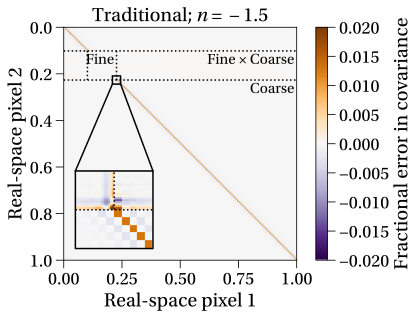

In [4]:
cp.cov_zoom_demo(method=cz.methods.traditional.TraditionalZoomConstrained,
                 errors=True,with_constraint=False,
                 plaw=-1.5,vmin=-0.02,vmax=0.02)

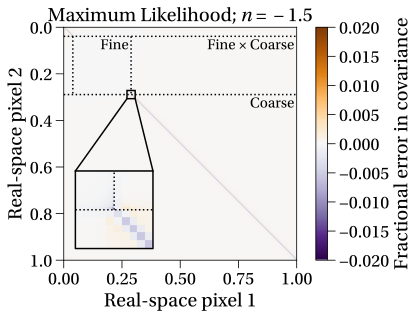

In [5]:
cp.cov_zoom_demo(method=cz.methods.ml.MLZoomConstrained,
                 errors=True,with_constraint=False,
                 plaw=-1.5,vmin=-0.02,vmax=0.02)

Perform a comparison of constraints:

Traditional constraint value 1.00 (target 1.00)
Fast Filter constraint value 1.00 (target 1.00)
Idealized constraint value 1.00 (target 1.00)
Traditional constraint value -0.00 (target 1.00)
Fast Filter constraint value 0.00 (target 1.00)


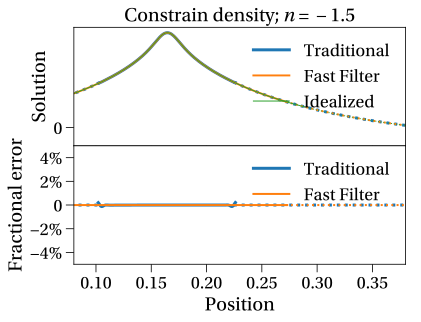

In [6]:
cp.compare_constraints_with_errors(plaw=-1.5, velocity=False, covector_width=50)

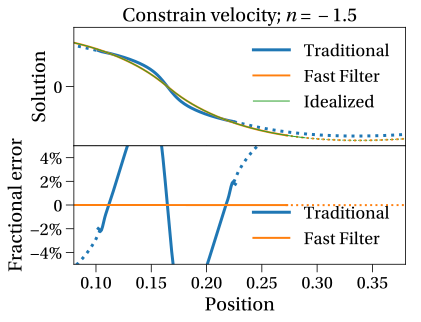

In [7]:
cp.compare_constraints_with_errors(plaw=-1.5, velocity=True, covector_width=50)

Try an actual example where we set a constraint target to zero, to check that it is satisfied

Fast Filter constraint value -0.00 (target 0.00; rms 0.00; rms without constraint 2.64; suppression 100.0%)
Traditional constraint value 0.00 (target 0.00; rms 0.01; rms without constraint 2.64; suppression 99.7%)


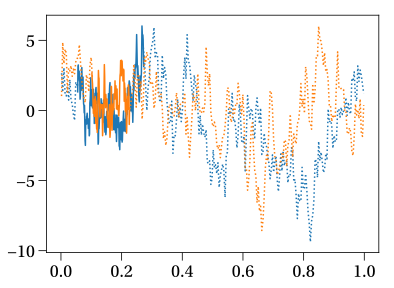

In [8]:
covec = cz.constraint_vector(100,256)
cp.zoom_demo(constraint_covec=covec, constraint_val=0,method=cz.methods.FilteredZoomConstrained)
cp.zoom_demo(constraint_covec=covec, constraint_val=0,method=cz.methods.TraditionalZoomConstrained)